# Pokémon EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./pokemon.csv', index_col=0)

## Quick Review

In [3]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [5]:
data[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


## Visualizations

### Pokémon Types

In [6]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [7]:
colors = ["#a040a0", "#a890f0", "#7038f8", "#e0c068", "#e898e8",
          "#78c850", "#c03028", "#f85888", "#b8b8d0", "#98d8d8", 
          "#b8a038", "#705848", "#6890f0", "#f8d030", "#f08030",
          "#705898", "#a8b820", "#8a8a59"]

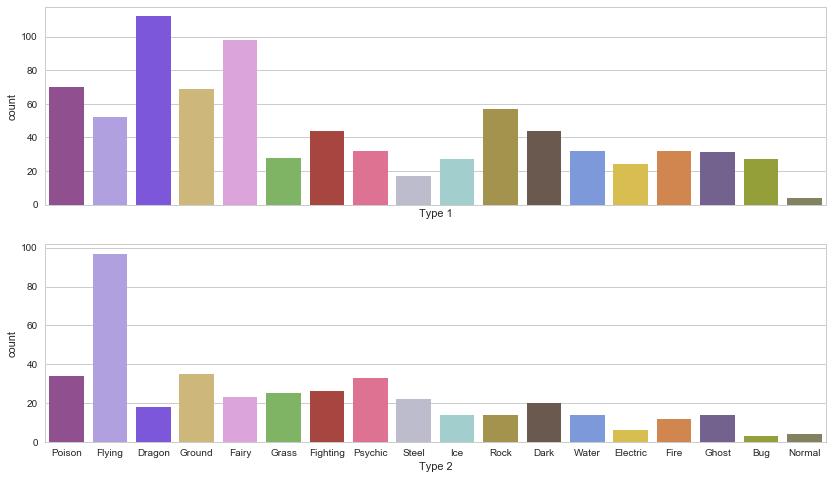

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
with sns.color_palette(colors, n_colors=18, desat=.9):
    sns.countplot('Type 1', data=data, ax=ax1)
    sns.countplot('Type 2', data=data, ax=ax2)

### Total, HP, Attack, Defense and Speed Pair Plot

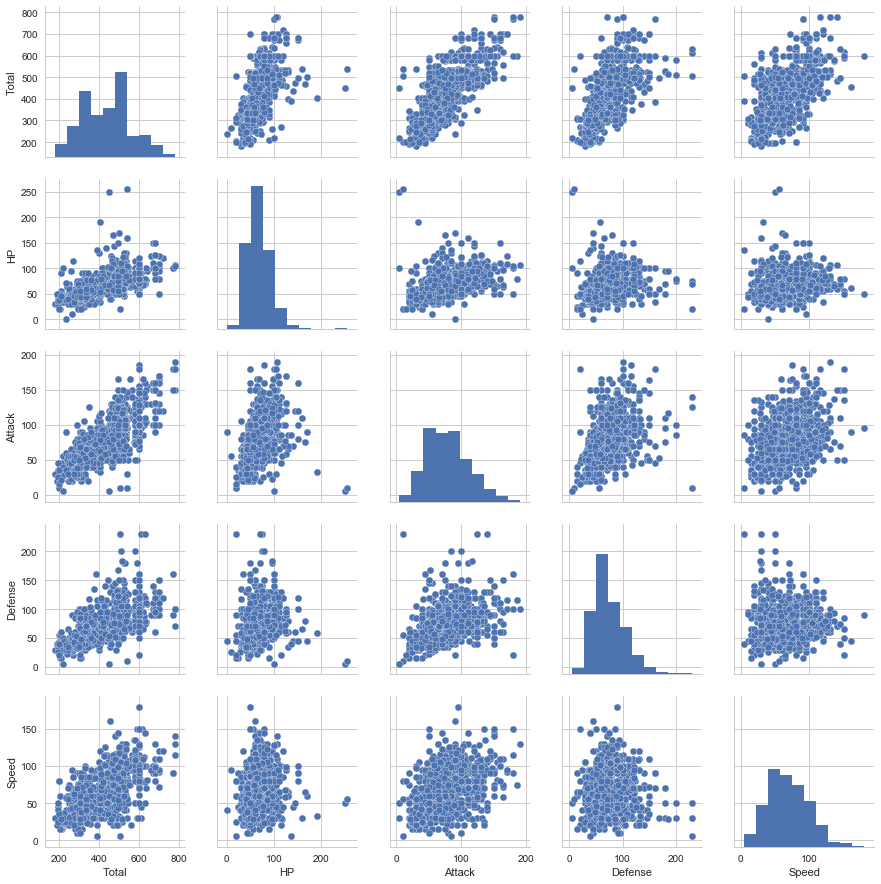

In [9]:
plot = sns.pairplot(data[['Total', 'HP', 'Attack', 'Defense', 'Speed']])

### Generation and Legendary

In [10]:
data['Generation'].unique()

array([1, 2, 3, 4, 5, 6])

In [11]:
Counter(data['Legendary'])

Counter({False: 735, True: 65})

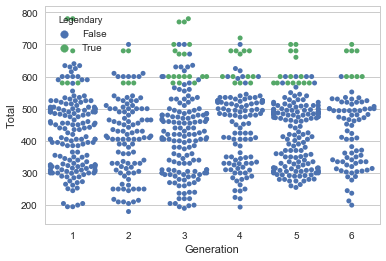

In [12]:
plot = sns.swarmplot(x="Generation", y="Total", hue="Legendary", data=data)

### Total and Type Box Plot

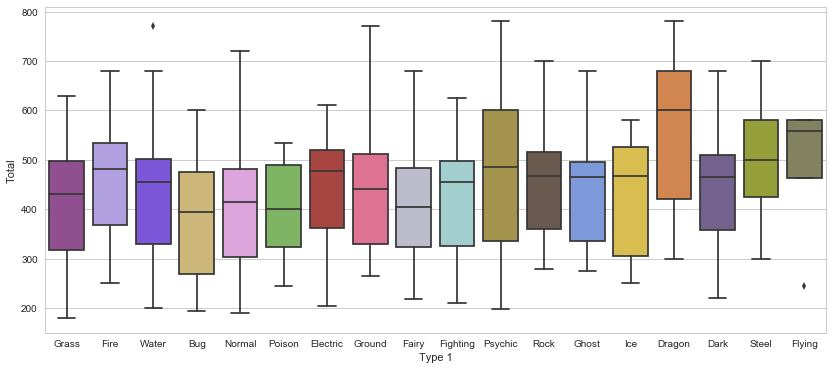

In [13]:
f, ax = plt.subplots(figsize=(14, 6))
with sns.color_palette(colors, n_colors=18, desat=.9):
    sns.boxplot(x=data['Type 1'], y=data['Total'])

### Attack and Defense KDE Plot

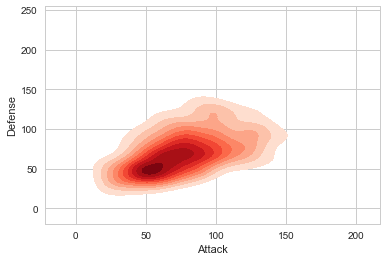

In [14]:
ax = sns.kdeplot(data['Attack'], data['Defense'],
             cmap="Reds", shade=True, shade_lowest=False)